<a href="https://colab.research.google.com/github/Varshitha-kommuri/SENTIMENT-ANALYSIS-OF-RESTAURANT-REVIEWS/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense

df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
df.head()
x = df.drop('Liked',axis=1)
x = df.drop('Liked',axis=1)
print(x.shape)
x.head()

y = df['Liked']
print(y.shape)  #(1000,)
y.head()

x.tail()


(1000, 1)
(1000,)


,Review
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."
999,"Then, as if I hadn't wasted enough of my life ..."


In [ ]:
voc_size = 5000

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

#DATA PREPROCESSING
ps = PorterStemmer()
corpus = []

for i in range(0,len(df)):

  #Substituting any other other character other than A-Z or a-z with ' '.
  review = re.sub('[^A-Za-z]',' ',df['Review'][i])

  #Converting all the words into lowercase.
  review = review.lower()

  #Splitting the words.
  review = review.split()

  #If the word doesnot belong to the stopwords, then add it into review.
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

  #Joining the words after stemming.
  review = ' '.join(review)

  #Appending the review to corpus list.
  corpus.append(review)

# onehot_representation
onehot_rep = [one_hot(words,voc_size)for words in corpus]
max_count = 0

for i in range(0,len(onehot_rep)):
  count = len(onehot_rep[i])
  if(count>max_count):
    max_count = count
print("Max_length : ",max_count)
max_len = 20
embedded_seqs = pad_sequences(onehot_rep,padding = 'pre',maxlen = max_len)
print(embedded_seqs)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Creating model

embedding_vector_features = 45
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length = max_len))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 45)            225000    
                                                                 
 lstm_7 (LSTM)               (None, 100)               58400     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 283501 (1.08 MB)
Trainable params: 283501 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
X = np.array(embedded_seqs)
Y = np.array(y)
print(X.shape)
print(Y.shape)

(1000, 20)
(1000,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 42)

In [ ]:
model_history = model.fit(X_train,Y_train,validation_split = 0.2,epochs=10,batch_size=64)

Epoch 1/10
9/9 [==============================] - 3s 115ms/step - loss: 0.6925 - accuracy: 0.5149 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 0s 46ms/step - loss: 0.6864 - accuracy: 0.5149 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 3/10
9/9 [==============================] - 0s 43ms/step - loss: 0.6712 - accuracy: 0.6642 - val_loss: 0.6769 - val_accuracy: 0.6418
Epoch 4/10
9/9 [==============================] - 0s 44ms/step - loss: 0.6252 - accuracy: 0.8619 - val_loss: 0.6691 - val_accuracy: 0.5299
Epoch 5/10
9/9 [==============================] - 0s 45ms/step - loss: 0.5470 - accuracy: 0.7276 - val_loss: 0.6411 - val_accuracy: 0.5896
Epoch 6/10
9/9 [==============================] - 0s 44ms/step - loss: 0.4485 - accuracy: 0.8246 - val_loss: 0.5795 - val_accuracy: 0.7090
Epoch 7/10
9/9 [==============================] - 0s 41ms/step - loss: 0.3449 - accuracy: 0.9198 - val_loss: 0.7995 - val_accuracy: 0.6418
Epoch 8/10
9/9 [==========

In [ ]:
pred = model.predict(X_test)
for i in range(len(pred)):
 if pred[i]>0.5:
  pred[i]=1
 else:
  pred[i]=0
score1 = metrics.accuracy_score(Y_test,pred)
score2 = metrics.precision_score(Y_test,pred)
score3 = metrics.recall_score(Y_test,pred)
score4 = (2*score2*score3)/(score2+score3)
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))
print("F1 score is: {}%".format(round(score4*100,2)))

11/11 [==============================] - 1s 9ms/step
Accuracy score is : 72.73%
Precision score is: 72.19%
Recall score is: 69.43%
F1 score is: 70.78%


In [ ]:
import matplotlib.pyplot as plt

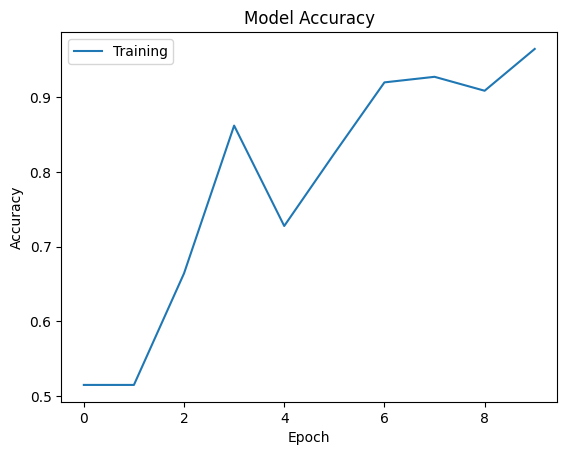

In [ ]:
#PERFORMANCE CHARTS.

plt.plot(model_history.history['accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training'],loc='upper left')
plt.show()

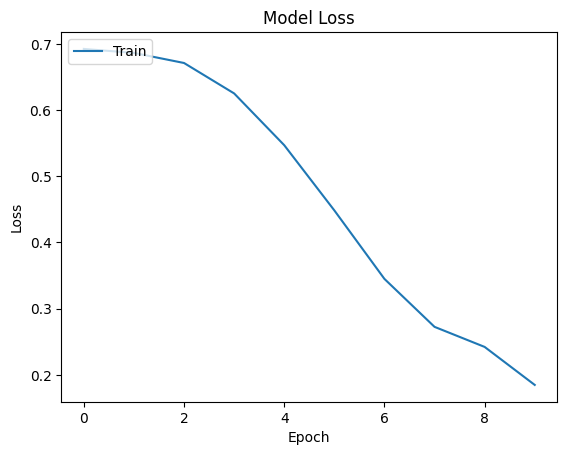

In [ ]:
plt.plot(model_history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'],loc='upper left')
plt.show()

Confusion matrix , without normalization


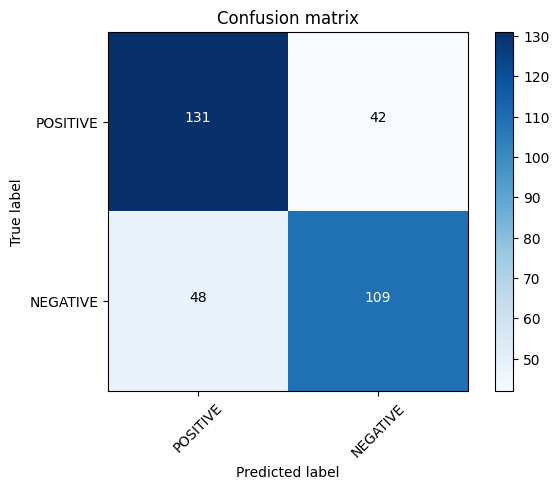

In [ ]:
# Plotting confusion matrix
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title = 'Confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matix")
  else:
    print("Confusion matrix , without normalization")
  thresh = cm.max()/2.0
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j] >thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm,classes=['POSITIVE','NEGATIVE'])

In [ ]:
def predict_sample(sample):
    # Preprocess the input text
    review = re.sub('[^A-Za-z]', ' ', sample)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)

    # Convert the preprocessed text into a one-hot representation
    onehot_rep = [one_hot(review, voc_size)]

    # Pad the one-hot representation
    embedded_seq = pad_sequences(onehot_rep, padding='pre', maxlen=max_len)

    # Make predictions using the model
    predictions = model.predict(np.array(embedded_seq))

    # Check if the sentiment is positive (1) or negative (0)
    if predictions > 0.5:
        return 1
    else:
        return 0


In [ ]:
sample = "Overall experience was good, fell in love with the pasta"
if predict_sample(sample) :
        print(sample+" - It is a positive review")
else:
        print(sample+" - It is a negative review")

sample = "The bread was dry"
if predict_sample(sample) :
        print(sample+" - It is a positive review")
else:
        print(sample+" - It is a negative review")


1/1 [==============================] - 0s 47ms/step
Overall experience was good, fell in love with the pasta - It is a positive review
1/1 [==============================] - 0s 44ms/step
The bread was dry - It is a negative review
